In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import os
import tensorflow as tf

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [6]:
import torch

In [11]:
from torcheval.metrics.functional import multiclass_accuracy

In [7]:
from sklearn.datasets import load_iris

In [9]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [10]:
torch.cuda.is_available()

True

# Intro to Deep Learning

## Live Demo

In [12]:
# python basic operation
a = 10
b = 15
# result is of type int
(3 * a + 4 * b) ** 2

8100

In [13]:
# python list manipulation similar to numpy
a = [10, 17, 28, 13, 12]
b = [22, 12, 55, 11, 7]
# result is type list
[(3 * x + 4 * y) for x, y in zip(a, b)]

[118, 99, 304, 83, 64]

In [14]:
# numpy version with vectorization
a = np.array([10, 17, 28, 13, 12])
b = np.array([22, 12, 55, 11, 7])
print((3 * a + 4 * b) ** 2)
print(type((3 * a + 4 * b) ** 2))

[13924  9801 92416  6889  4096]
<class 'numpy.ndarray'>


In [15]:
# tensorflow version
a = tf.constant([10, 17, 28, 13, 12])
b = tf.constant([22, 12, 55, 11, 7])
print((3 * a + 4 * b) ** 2)
print(type((3 * a + 4 * b) ** 2))

tf.Tensor([13924  9801 92416  6889  4096], shape=(5,), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


2024-12-14 13:48:23.054292: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-14 13:48:23.058120: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-14 13:48:23.058447: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-14 13:48:23.058677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

In [16]:
# torch version
a = torch.tensor([10, 17, 28, 13, 12])
b = torch.tensor([22, 12, 55, 11, 7])
print((3 * a + 4 * b) ** 2)
print(type((3 * a + 4 * b) ** 2))

tensor([13924,  9801, 92416,  6889,  4096])
<class 'torch.Tensor'>


In [17]:
# if we want to pass a clean python function to tensorflow, we decorate it (tensorflow 2.)
def tf_input_decorator(func):
    def wrapper(*args, **kwargs):
        # Convert all positional arguments to tensors
        tf_args = [tf.convert_to_tensor(arg) for arg in args]
        # Convert all keyword arguments to tensors
        tf_kwargs = {key: tf.convert_to_tensor(value) for key, value in kwargs.items()}
        # Call the original function with TensorFlow objects
        return func(*tf_args, **tf_kwargs)
    return wrapper

In [18]:
@tf_input_decorator
def my_func(a, b):
    return (3 * a + 4 * b) ** 2

In [19]:
a = [10, 17, 28, 13, 12]
b = [22, 12, 55, 11, 7]
my_func(a, b)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([13924,  9801, 92416,  6889,  4096], dtype=int32)>

In [20]:
iris_df = load_iris()

In [21]:
attrs, labels = iris_df.data, iris_df.target

In [22]:
(attrs.shape[1], )

(4,)

In [23]:
len(set(labels))

3

In [24]:
model_tf = Sequential([
    Input((attrs.shape[1],)), # input layer, shape passed count of the attributes passed as tuple
    # no hidden layers
    Dense(len(set(labels))) # output layer
])

We expect 3 logistic regressions with 4 input params each and a bias, total 15 elements for inpout and 3 for output

In [25]:
model_tf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


Must define proper loss function in order to set the model as regressor or classifier

Crossentropy is the classification loss function. Binary (for 2 classes) and categorigal (for > 2 classes). If the data is 'normal', this means that all the classes are listed in one column, before one-hot-encoding, must use 'sparse CE', if the data is like OHE, then use 'categorical CE'

In [26]:
model_tf.compile(loss='sparse_categorical_crossentropy')

The model expects probas, this means that it has to sum to 1. We need activation function

In [27]:
model_tf = Sequential([
    Input((attrs.shape[1],)), # input layer, shape passed count of the attributes passed as tuple
    # no hidden layers
    Dense(len(set(labels)), activation='softmax') # output layer
])

If activation is not stated, the model will collapse to basic linear regression. **softmax** is used with more than 1 class. If only one class - **sigmoid**. 

In [28]:
model_tf.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

**optimizer** or solver is the algorithm used for gradient descent.


In [29]:
model_tf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


Then we fit the model

In [30]:
model_tf.fit(attrs, labels)

5/5 [==============================] - 2s 4ms/step - loss: 1.3272


Output Breakdown
1. 5/5

Indicates the number of batches processed out of the total number of batches in the epoch.
Here, 5 is both the current batch count and the total batch count, meaning the training data was split into 5 batches for this epoch.

2. [==============================]

A visual representation of the progress of the current epoch. The bar fills up as training progresses through the batches.

3. - 2s

The time taken to complete the current epoch (in this case, 2 seconds).

4. 5ms/step

The average time (in milliseconds) taken to process one batch (or step) during training.

5. loss: 4.1142

The loss value calculated at the end of the epoch.
This value is the output of the loss function used during training and reflects how well the model is performing on the training data. A lower value generally indicates better performance.

6. <keras.callbacks.History at 0x7f4a70470250>

After training, Keras returns a History object, which contains the details of the training process, such as loss values and metrics for each epoch.
The memory address (0x7f4a70470250) indicates where this History object is stored in memory.

In [31]:
history = model_tf.fit(attrs, labels)

5/5 [==============================] - 0s 5ms/step - loss: 1.2914


The fit is partial fit, so every time we run a 'fit' it is not reseting but instead fitting the data to the model once again. The loss function is being reduced. If we increase the **batch** per epoch, the result is more processed batched per epoch. 

In [32]:
model_tf.fit(attrs, labels, batch_size=8)

19/19 [==============================] - 0s 16ms/step - loss: 1.2232


This is the 3rd training of the model on the data. Each training is called **epoch**. We set the epoch so it is done automatically

In [33]:
model_tf.fit(attrs, labels, batch_size=8, epochs=1000)

Epoch 1/1000
19/19 [==============================] - 0s 9ms/step - loss: 1.1389
Epoch 2/1000
19/19 [==============================] - 0s 5ms/step - loss: 1.0734
Epoch 3/1000
19/19 [==============================] - 0s 5ms/step - loss: 1.0262
Epoch 4/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.9938
Epoch 5/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.9697
Epoch 6/1000
19/19 [==============================] - 0s 4ms/step - loss: 0.9492
Epoch 7/1000
19/19 [==============================] - 0s 3ms/step - loss: 0.9324
Epoch 8/1000
19/19 [==============================] - 0s 3ms/step - loss: 0.9163
Epoch 9/1000
19/19 [==============================] - 0s 3ms/step - loss: 0.9053
Epoch 10/1000
19/19 [==============================] - 0s 3ms/step - loss: 0.8859
Epoch 11/1000
19/19 [==============================] - 0s 3ms/step - loss: 0.8714
Epoch 12/1000
19/19 [==============================] - 0s 3ms/step - loss: 0.8587
Epoch 13/1000
19/19 [====

In order to initialize the model again, we need to clear the session. If we run the basic cell, the model number is increased and previous model stored in memory. It is not good because the memory space is important.

In [34]:
model_tf = Sequential([
    Input((attrs.shape[1],)), # input layer, shape passed count of the attributes passed as tuple
    # no hidden layers
    Dense(len(set(labels)), activation='softmax') # output layer
])

In [35]:
model_tf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [36]:
# clearing the session
tf.keras.backend.clear_session()

In [37]:
model_tf = Sequential([
    Input((attrs.shape[1],)), # input layer, shape passed count of the attributes passed as tuple
    # no hidden layers
    Dense(len(set(labels)), activation='softmax') # output layer and activation function
])

In [38]:
model_tf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_tf.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [40]:
history = model_tf.fit(attrs, labels, batch_size=8, epochs=200)

Epoch 1/200
19/19 [==============================] - 0s 7ms/step - loss: 3.7287
Epoch 2/200
19/19 [==============================] - 0s 6ms/step - loss: 3.3813
Epoch 3/200
19/19 [==============================] - 0s 5ms/step - loss: 3.0406
Epoch 4/200
19/19 [==============================] - 0s 5ms/step - loss: 2.7184
Epoch 5/200
19/19 [==============================] - 0s 5ms/step - loss: 2.4311
Epoch 6/200
19/19 [==============================] - 0s 5ms/step - loss: 2.1920
Epoch 7/200
19/19 [==============================] - 0s 3ms/step - loss: 1.9816
Epoch 8/200
19/19 [==============================] - 0s 4ms/step - loss: 1.8160
Epoch 9/200
19/19 [==============================] - 0s 5ms/step - loss: 1.6574
Epoch 10/200
19/19 [==============================] - 0s 4ms/step - loss: 1.5178
Epoch 11/200
19/19 [==============================] - 0s 3ms/step - loss: 1.4025
Epoch 12/200
19/19 [==============================] - 0s 3ms/step - loss: 1.2843
Epoch 13/200
19/19 [=================

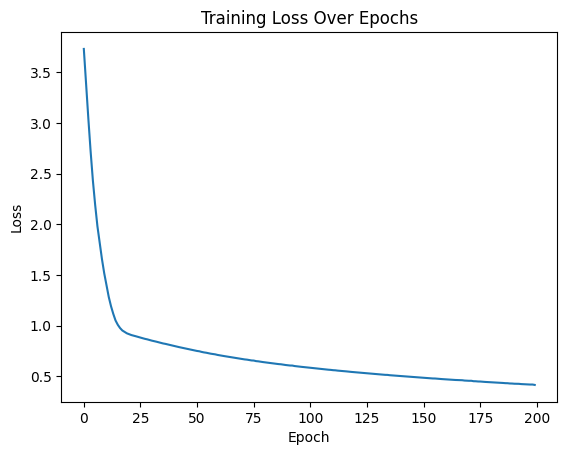

In [41]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

In [42]:
tf.argmax(model_tf.predict(attrs), axis=1)

5/5 [==============================] - 0s 5ms/step


<tf.Tensor: shape=(150,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])>

In [43]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We can add metrics while compiling the model. The metrics will be displayed and added to the **history**. It is providing the score of the model against the training set during training.

In [44]:
model_tf.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
model_tf.fit(attrs, labels, batch_size=8)

19/19 [==============================] - 0s 11ms/step - loss: 0.4162 - accuracy: 0.9333


In [46]:
model_tf.evaluate(attrs, labels) # score in scikit learn

5/5 [==============================] - 0s 5ms/step - loss: 0.4138 - accuracy: 0.9333


[0.4138129651546478, 0.9333333373069763]

Going deep in TensorFlow by adding **Dense** layer with **relu** activation

In [65]:
model_tf = Sequential([
    Input((attrs.shape[1],)), # input layer, shape passed count of the attributes passed as tuple
    Dense(20, activation='relu'), # hidden layer
    Dense(10, activation='relu'), # hidden layer
    Dense(len(set(labels)), activation='softmax') # output layer and activation function
])

In [66]:
model_tf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 20)                100       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_tf.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
model_tf.fit(attrs, labels, batch_size=8, epochs=100)

Epoch 1/100
19/19 [==============================] - 0s 9ms/step - loss: 1.5676 - accuracy: 0.3333
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 1.1822 - accuracy: 0.3333
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 1.0478 - accuracy: 0.3733
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 1.0138 - accuracy: 0.6600
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 0.9796 - accuracy: 0.5000
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 0.9525 - accuracy: 0.6000
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 0.9239 - accuracy: 0.6467
Epoch 8/100
19/19 [==============================] - 0s 8ms/step - loss: 0.8943 - accuracy: 0.6467
Epoch 9/100
19/19 [==============================] - 0s 6ms/step - loss: 0.8600 - accuracy: 0.6533
Epoch 10/100
19/19 [==============================] - 0s 5ms/step - loss: 0.8265 - accuracy: 0.6600
Epoch 11/

A model constructed this way would require less *epochs* to reach minimum loss. Therefore, the deeper model has bigger capacity and is training a lot faster

### Pytorch

Pytorch has an OOP based API. Must convert all the values to tensors.

In [56]:
class LogisticRegressionPT(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionPT, self).__init__()
        self.layer = torch.nn.Linear(n_features, n_classes)

    def forward(self, x):
        x = torch.nn.functional.softmax(self.layer(x), dim=1)
        return x

In [57]:
n_features = attrs.shape[1]
n_classes = len(set(labels))
pt_model = LogisticRegressionPT()

In [58]:
print(pt_model)

LogisticRegressionPT(
  (layer): Linear(in_features=4, out_features=3, bias=True)
)


In [59]:
# conveert the data to pytorch tensors
attrs_pt = torch.FloatTensor(attrs)
labels_pt = torch.LongTensor(labels)

In [60]:
learning_rate = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(pt_model.parameters(), lr=learning_rate)

In [61]:
# training the model by creating a function
def train(model, optimizer, criterion, X, y, num_epochs, train_losses):
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        output_train = model(X) # forward

        loss_train = criterion(output_train, y)
        loss_train.backward() # backward
        optimizer.step() # weights update

        train_losses[epoch] = loss_train.item()

        if (epoch + 1) % 50 == 0:
            print(f'Epoch: {epoch + 1} / {num_epochs}, Loss: {loss_train.item():.4f}')

In [62]:
num_epochs = 200
train_losses = np.zeros(num_epochs)

train(pt_model, optimizer, criterion, attrs_pt, labels_pt, num_epochs, train_losses)

Epoch: 50 / 200, Loss: 0.8584
Epoch: 100 / 200, Loss: 0.7858
Epoch: 150 / 200, Loss: 0.7369
Epoch: 200 / 200, Loss: 0.7033


Fast fitting can be achieved using **PyTorch lightning**. This is analogue to **keras**. It is additional package that must be installed. In addition, saves writing of code.

The evaluation is done:

In [63]:
predictions = torch.argmax(pt_model.forward(attrs_pt), dim=1)
multiclass_accuracy(predictions, labels_pt)

tensor(0.9733)

Adding layer of neurons is done in tha class. However, the output of the first layer is the input of the second layer and so on. The final layer has the final output. The function of the final layer is kept **softmax**. The rest are changed to **relu**

In [64]:
class LogisticRegressionPT(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionPT, self).__init__()
        self.layer1 = torch.nn.Linear(n_features, 20)
        self.layer2 = torch.nn.Linear(20, 10)
        self.layer3 = torch.nn.Linear(10, n_classes)

    def forward(self, x):
        x = torch.nn.functional.relu(self.layer1(x), dim=1)
        x = torch.nn.functional.relu(self.layer2(x), dim=1)
        x = torch.nn.functional.softmax(self.layer3(x), dim=1)
        return x